
# Project: Investigating TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitation</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

    This analysis or investigation is to look into the TMDb data set which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It is to look into the relations that columns or data characteristics like the genre, release year, user rating, revenue and budget of a movie have on its overall rating and profit based on the data from The Movie Database (TMDb).

### Question(s) for Analysis

    Questions that can be analyzed from the chosen dataset include:
    1. Which movie genres are most popular from year to year?
    2. What is the average runtime of all the movies?
    3. Which movies had most and least profit?
    4. Which year had the most profitable movies?
    5. Which actors had the most appearances in films?

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#importing all packages necessary to aid in analysis of dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling - Gathering, Assessing and Cleaning

### General Properties
    Reading .csv file into the pandas dataframe.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading and storing .csv file in variable "tmbd"
tmdb = pd.read_csv('tmdb-movies.csv')

#Viewing first five row sample of the dataset using the .head() function
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Some Dataset Observations:
1. No unit of currency is stated in the dataset. So I will take do my analysis with the values proved as they are represented.

2. Almost all movies have more than one genre, the movies consists different genre types.

3. The runtime of movies doesn't mention if it's in seconds, minutes or hours but looking at the values in the column, i will take them to be in minutes.

4. Some of the columns such as ythe cast, homepage and genre have characters like "|" and "/" in them which will have to be looked at.

In [6]:
#Determinig the dimension of the dataset to know the number of colmuns and rows
tmdb.shape

(10866, 21)

The above output shows our movie dataset has 10866 rows and 21 columns

In [7]:
#Using .info() to view a summary of the dataframe, showing number of non-null values
#and datatype of each column
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From The above output we can see the dataset has missing values in 9 columns; imdb_id, cast, homepage, director, tagline, keywords,overview, genres, production_companies

In [8]:
#Using .describe() to display statistical information of the dataset
#Shows the count, mean, standard deviation, min, 25th, 50th and 75th percentile and the max values
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We will now check for duplicate row values and drop them from the dataset in the codes below

In [9]:
#Checking For Duplicates in the dataset
tmdb.duplicated().sum()

1

The above output indicates one duplicated row

In [10]:
#Dropping duplicates
tmdb.drop_duplicates(inplace=True)

In [11]:
#Verify if removing the duplicates in the dataset worked
tmdb.duplicated().sum()

0

The above output shows duplicates have been removed from the dataset

In [11]:
#Checking if the dimensions of the dataset has changed after removing duplicates
tmdb.shape

(10865, 21)

From the above output the number of rows has been reduced by one, from 10866 to 10865

In [3]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Dropping unwanted columns fron the dataset
col_del = ['imdb_id', 'original_title', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date']

tmdb.drop(col_del, axis=1, inplace=True)

In [13]:
#Viewing the new dataframe
tmdb.head()

,id,popularity,budget,revenue,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
#Displaying a summary of the dataframe to aid in removing empty fields
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10865 non-null  int64  
 1   popularity    10865 non-null  float64
 2   budget        10865 non-null  int64  
 3   revenue       10865 non-null  int64  
 4   cast          10789 non-null  object 
 5   runtime       10865 non-null  int64  
 6   genres        10842 non-null  object 
 7   vote_count    10865 non-null  int64  
 8   vote_average  10865 non-null  float64
 9   release_year  10865 non-null  int64  
 10  budget_adj    10865 non-null  float64
 11  revenue_adj   10865 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.1+ MB


Now rows with Nan values in the dataframe are going to be removed

In [15]:
#Checking the number of Nan values in the genres and cast columns
tmdb['genres'].isnull().sum(), tmdb['cast'].isnull().sum()

(23, 76)

The output above indicate more Nan values in the cast column than the genre column

In [16]:
#Now we drop all Nan values in the dataframe
tmdb.dropna(inplace=True)

In [17]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10767 non-null  int64  
 1   popularity    10767 non-null  float64
 2   budget        10767 non-null  int64  
 3   revenue       10767 non-null  int64  
 4   cast          10767 non-null  object 
 5   runtime       10767 non-null  int64  
 6   genres        10767 non-null  object 
 7   vote_count    10767 non-null  int64  
 8   vote_average  10767 non-null  float64
 9   release_year  10767 non-null  int64  
 10  budget_adj    10767 non-null  float64
 11  revenue_adj   10767 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.1+ MB


From the summary of the dataframe above, no null values exist in the dataframe
It now has 10768 rows and 12 columns

Now We can go ahead with our Exploratory Analysis of our data.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What movie genre is the most popular ?

From observation, the genre column is made up of a string of different genres separated by pipe(|) characters.

We need to separate the movies into groups based on genres. Since each movie can have more than one genre, the simple way is to include a movie in the group for each genre it has, this will mean that a movie will be included in multiple dataframes.

This will limit the report because it will not look at every combination of genre as separate groups.


In [18]:
#Showing the number of different unique combinations of genres in the dataset
tmdb['genres'].nunique()

2030

The above output shows there are 2030 different combinations of genres persent in the dataset. This is far too many to analyze the combinations separately

Now we create an numpy array to store the genres from the genre column

In [19]:
#Creating  numpy array out of the genre column of the dataset
genre_arr = tmdb.genres.values
genre_arr = genre_arr.astype('U')
genre_arr

array(['Action|Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller', ..., 'Mystery|Comedy',
       'Action|Comedy', 'Horror'], dtype='<U51')

We now split the elements of the array by the pipe("|") delimiter and store the separated elements in a new array

In [20]:
split_genre_arr = np.char.split(genre_arr, sep='|')
split_genre_arr

array([list(['Action', 'Adventure', 'Science Fiction', 'Thriller']),
       list(['Action', 'Adventure', 'Science Fiction', 'Thriller']),
       list(['Adventure', 'Science Fiction', 'Thriller']), ...,
       list(['Mystery', 'Comedy']), list(['Action', 'Comedy']),
       list(['Horror'])], dtype=object)

The two code cells below is used to derive the maximum length of all genre tags and the total number of genres derived from splitting the values of the genre column

In [21]:
max_word_len = 0

for index, row in enumerate(split_genre_arr):
    for genre in split_genre_arr[index]:
        if len(genre) > max_word_len:
            max_word_len = len(genre)
        
print('max_word_len: ' + str(max_word_len))

max_word_len: 15


The output above shows the maximum length of words for genre tags for all genre column values.

In [22]:
total_num_genre = np.array(split_genre_arr)
total_num_genres = np.sum(total_num_genre, axis=0)
total_num_genres = len(total_num_genres)
print(total_num_genres)

26831


The output above show the total number of words derived from splitting the strings in the genre column in separate genres. It must be noted that some of these words are repeated genre tags accounting for the result

We now create a numpy array with the shape/dimension of 1 x the total number of words of the genres

In [23]:
genre_arr_combine = np.empty((1, total_num_genres), dtype = ('U' + str(max_word_len)))
genre_arr_combine.shape

(1, 26831)

The above output shows the new dimension of the numpy array; 1 row by 26831 columns, with the columns representing each derived genre

Now we set each element in our genre_arr_combine array in the code below

In [24]:
import ast
count = 0

for index, row in enumerate(split_genre_arr):
    row_list = ast.literal_eval(str(row))
    
    for genre in row_list:
        genre_arr_combine[0, count] = genre
        count += 1
print(genre_arr_combine)

[['Action' 'Adventure' 'Science Fiction' ... 'Action' 'Comedy' 'Horror']]


Lets remove the 'nan' values in our genre list which we combined above

In [25]:
#removing nan values from the array if any still exist
genre_arr_combine = np.delete(genre_arr_combine, np.where(genre_arr_combine == 'nan'))

Finding the unique genre in the genre_arr_combine array

In [26]:
genre_list = np.unique(genre_arr_combine)
print(genre_list)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


We now create a new dataframe for each genre from the list of all the unique genres present in our dataset

In [27]:
#Creating the individual dataframes
action = tmdb.loc[tmdb.genres.str.contains('Action', na=False)]
adventure = tmdb.loc[tmdb.genres.str.contains('Adventure', na=False)]
animation = tmdb.loc[tmdb.genres.str.contains('Animation', na=False)]
comedy = tmdb.loc[tmdb.genres.str.contains('Comedy', na=False)]
crime = tmdb.loc[tmdb.genres.str.contains('Crime', na=False)]
documentary = tmdb.loc[tmdb.genres.str.contains('Documentary', na=False)]
drama = tmdb.loc[tmdb.genres.str.contains('Drama', na=False)]
family =tmdb.loc[tmdb.genres.str.contains('Family', na=False)]
fantasy = tmdb.loc[tmdb.genres.str.contains('Fantasy', na=False)]
foreign = tmdb.loc[tmdb.genres.str.contains('Foreign', na=False)]
history = tmdb.loc[tmdb.genres.str.contains('History', na=False)]
horror = tmdb.loc[tmdb.genres.str.contains('Horror', na=False)]
music = tmdb.loc[tmdb.genres.str.contains('Music', na=False)]
mystery = tmdb.loc[tmdb.genres.str.contains('Mystery', na=False)]
romance = tmdb.loc[tmdb.genres.str.contains('Romance', na=False)]
science_fiction = tmdb.loc[tmdb.genres.str.contains('Science Fiction', na=False)]
tv_movie = tmdb.loc[tmdb.genres.str.contains('TV Movie', na=False)]
thriller = tmdb.loc[tmdb.genres.str.contains('Thriller', na=False)]
war = tmdb.loc[tmdb.genres.str.contains('War', na=False)]
western = tmdb.loc[tmdb.genres.str.contains('Western', na=False)]

Let's see how many of each unique genre is in the dataset and sorting the values from highest to lowest.

In [28]:
genre_total_count = []
for genre in genre_list:
    temp_name = genre.lower()
    temp_name = temp_name.replace(" ", "_")
    number = len(eval(temp_name + '.index'))
    
    genre_total_count.append([temp_name, number])
    
genre_total_count.sort(key = lambda x:x[1], reverse = True)

for index, genre in enumerate(genre_total_count):
    genre_total_count[index] = [genre[0].title(), genre[1]]

print(genre_total_count)

[['Drama', 4752], ['Comedy', 3785], ['Thriller', 2905], ['Action', 2381], ['Romance', 1712], ['Horror', 1637], ['Adventure', 1469], ['Crime', 1354], ['Science_Fiction', 1227], ['Family', 1219], ['Fantasy', 911], ['Mystery', 809], ['Animation', 669], ['Documentary', 478], ['Music', 405], ['History', 331], ['War', 268], ['Foreign', 187], ['Tv_Movie', 167], ['Western', 165]]


We will create bar plot to visualize this information

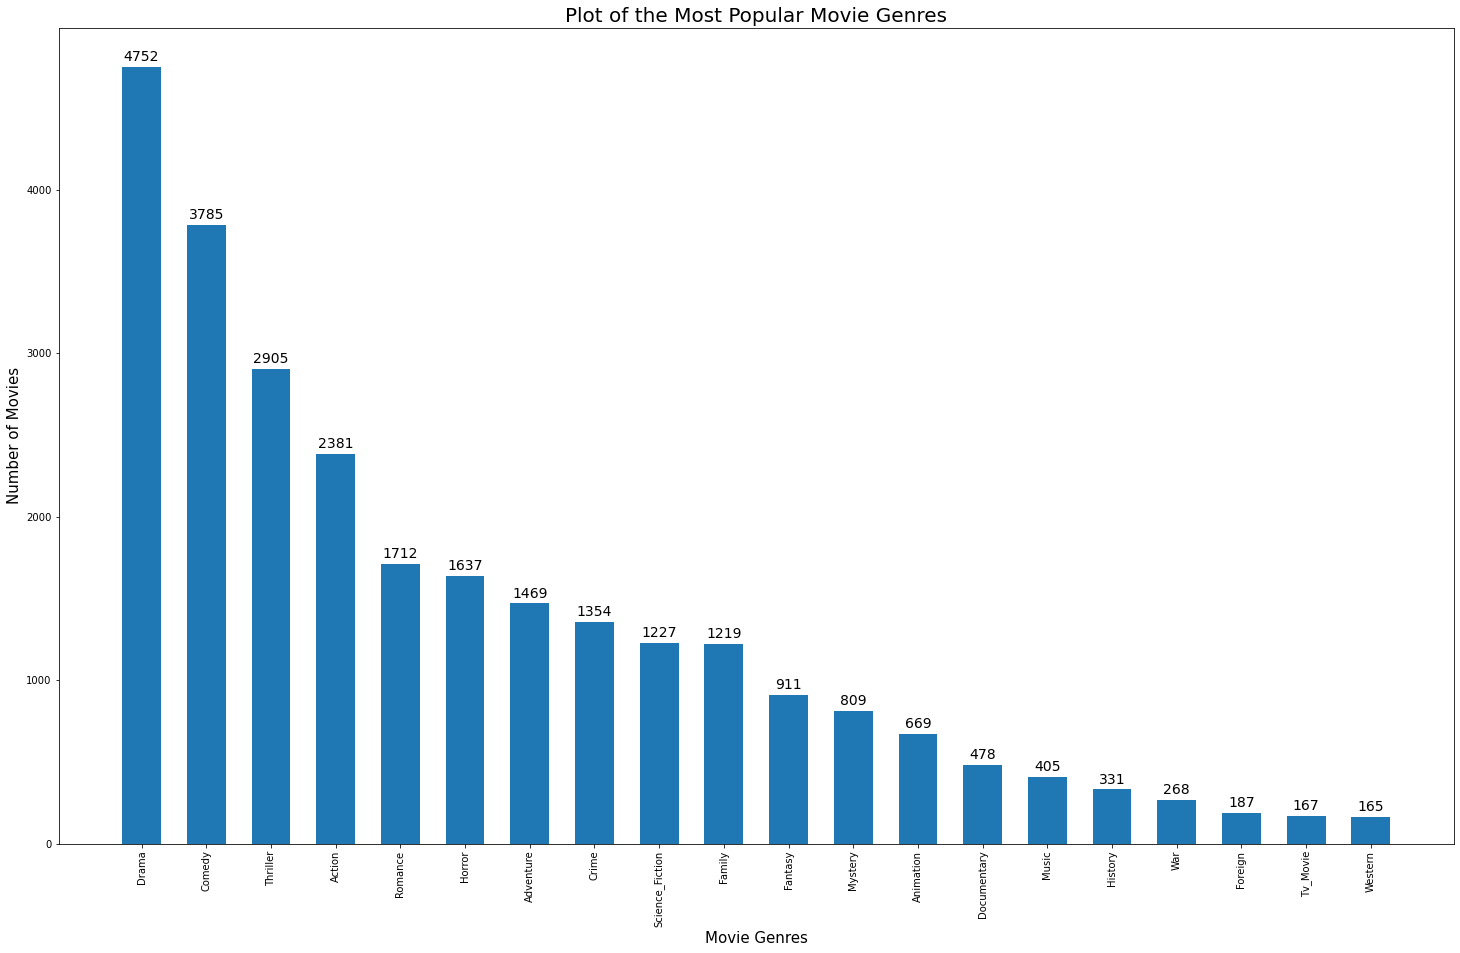

In [35]:
#Bar plot using matplotlib
y = tmdb.shape[0]
plt.figure(figsize=(25,15))
x, y = [*zip(*genre_total_count)]
plot = plt.bar(x, y, width = 0.6)
plt.xticks(rotation='vertical')
plt.title('Plot of the Most Popular Movie Genres', fontsize = 20)
plt.xlabel('Movie Genres', fontsize = 15)
plt.ylabel('Number of Movies', fontsize = 15)
#plt.show()

# Placing the values of each genre above the bars.
for p in plot.patches:
    plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', fontsize = 14, xytext = (0, 10), textcoords = 'offset points')

plt.show()

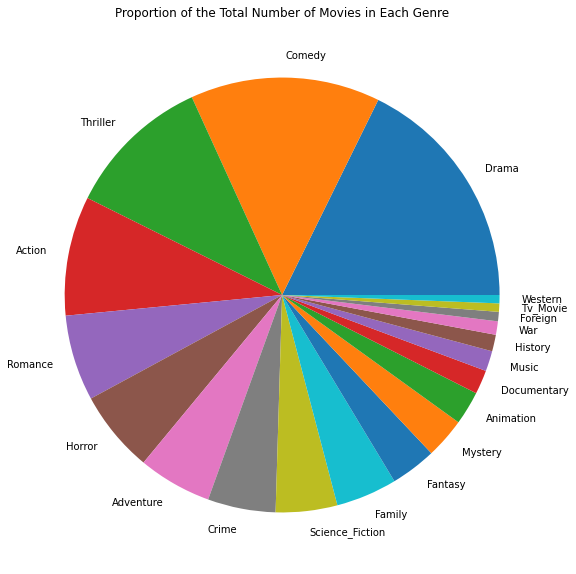

In [36]:
genre, amount = [*zip(*genre_total_count)]
plt.figure(figsize = (10, 10))
plt.title('Proportion of the Total Number of Movies in Each Genre')
plt.pie(amount, labels = genre, textprops = {'fontsize': 10})

plt.show()

From the above bar and pie charts, we can see the genres that have the most movies. The top three genres are Drama, Comedy, and Thriller. With Foreign, Tv Movie and Western been the least three most the genres.

### Research Question 2  : What is the average runtime of the movies in our dataset?

In [87]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

In [37]:
avg_run = tmdb['runtime'].mean()
avg_run

102.41339277421751

Lets plot this finding graphical usig a histogram

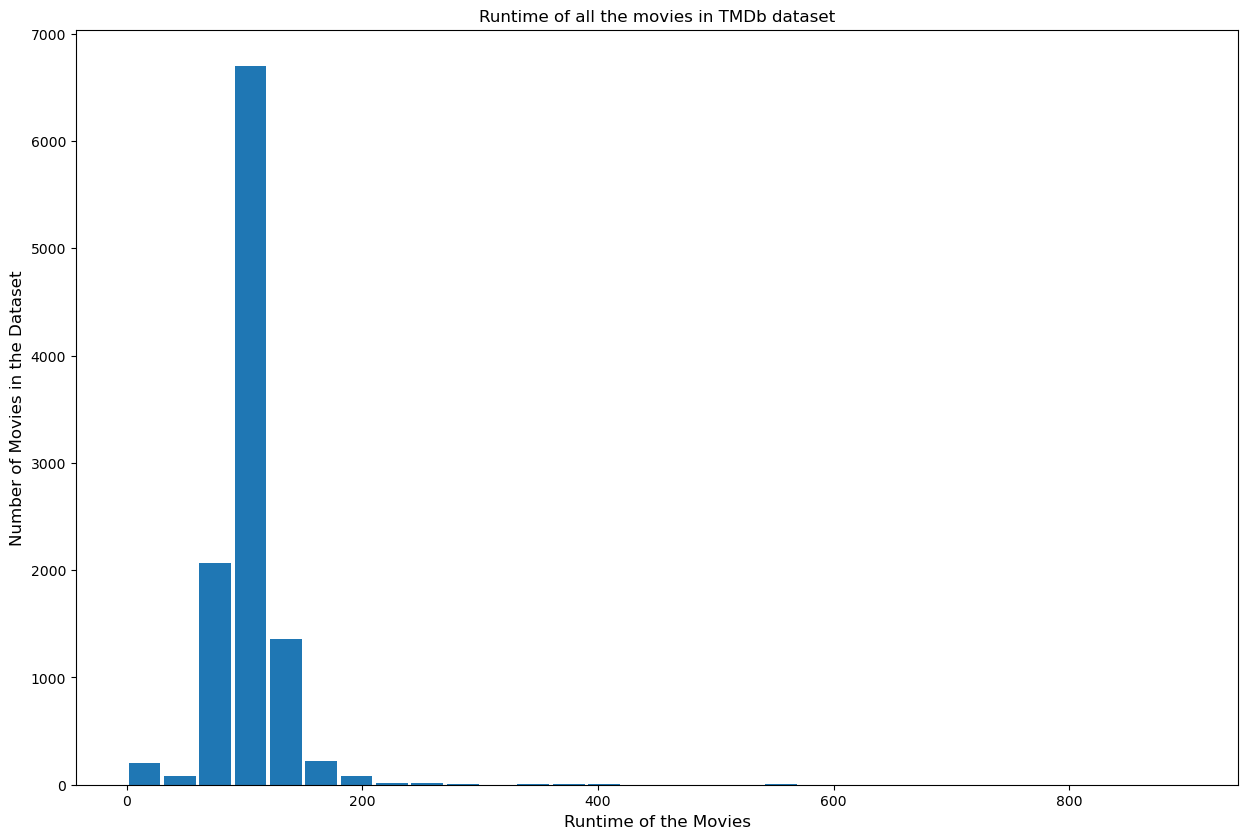

In [40]:
plt.figure(figsize=(15,10), dpi=100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 12)
#On y-axis 
plt.ylabel('Number of Movies in the Dataset', fontsize=12)
#Name of the graph
plt.title('Runtime of all the movies in TMDb dataset', fontsize=12)

#giving a histogram plot
plt.hist(tmdb['runtime'],rwidth = 0.9,bins =30)
#displays the plot
plt.show()

The distribution of the graph above is positively skewed or right skewed. Meaning a high number of the movies are timed between approximately 80 mintues to approximately 150 minutes. Almost 3400 and more number of movies fall in this criteria.

Now Lets see what kind of correlation exist between the Runtime and Revenue of the movies

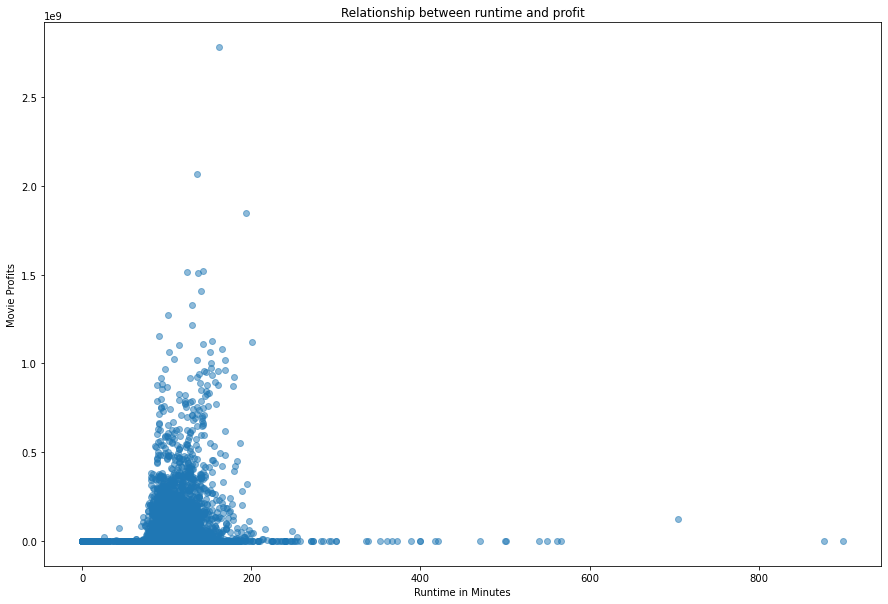

In [45]:
plt.figure(figsize=(15,10))
# x-axis
plt.xlabel('Runtime in Minutes')
# y-axis
plt.ylabel('Movie Profits')
# Title of the histogram
plt.title('Relationship between runtime and profit')
plt.scatter(tmdb['runtime'], tmdb['revenue'], alpha=0.5)
plt.show()

From the above scatter plot, we can also see that the movies with the highset profits fall between the runtimes of about 80 mins to about 200 mins.

### Research Question 3  : Which movies had most and least profit?

For this analysis we need to calculate the profit for each movie

1. We to create a profit column in our dataset to hold the profit made for each movie.
2. We use the ```insert()``` function with three parameters(index of the column in the dataset to insert, name of the column created, value to be inserted)

In [47]:
tmdb.insert(2,'profit_earned',tmdb['revenue']-tmdb['budget'])
tmdb.head()

,id,popularity,profit_earned,budget,revenue,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1363528810,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,228436354,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,185238201,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,1868178225,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,1316249360,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [48]:
#import pprint
#defining the function
def calculate(column):
    #Calculate highest earned profit
    high_prof = tmdb[column].idxmax()
    high_prof_details = pd.DataFrame(tmdb.loc[high_prof])
    
    #calculate lowest earned profit
    low_prof = tmdb[column].idxmin()
    low_prof_details = pd.DataFrame(tmdb.loc[low_prof])
    
    #concatenating both high profit data and low profit data
    #Assigning concatenated data into a variable
    profit_info = pd.concat([high_prof_details, low_prof_details], axis=1)
    
    return profit_info

#calling the function
calculate('profit_earned')

,1386,2244
id,19995,46528
popularity,9.432768,0.25054
profit_earned,2544505847,-413912431
budget,237000000,425000000
revenue,2781505847,11087569
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
vote_count,8458,74
vote_average,7.1,6.4


From the above output;
We that column with id 1386 shows details of the movie with is related information that made the highest earned profit of 2544505847

Whereas we see that the column with id 2244 shows the movie that made lowest earned profit of -413912431

Below we check if there is any correlation between a movie's budget and the profits earned

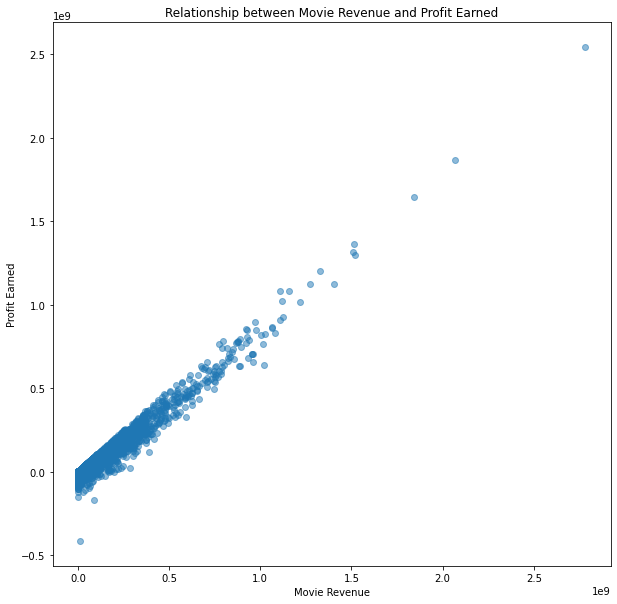

In [57]:
#Scatter plot to cheeck for the correlation between budget and profit earned
plt.figure(figsize=(10,10))
# x-axis
plt.xlabel('Movie Revenue')
# y-axis
plt.ylabel('Profit Earned')
# Title of the histogram
plt.title('Relationship between Movie Revenue and Profit Earned')
plt.scatter(tmdb['revenue'], tmdb['profit_earned'], alpha=0.5)
plt.show()

From the above scatter plot, we can see that there is a positive correlation between revenue made and profit earned. Meaning a higher revenue also meant a higher profit earned.

### Research Question 4  : Which year had most profitable movies (most profitable movies per year)?

In this analysis we will be looking at the year of release of our movies and find out which of the years had the most profitable movies.

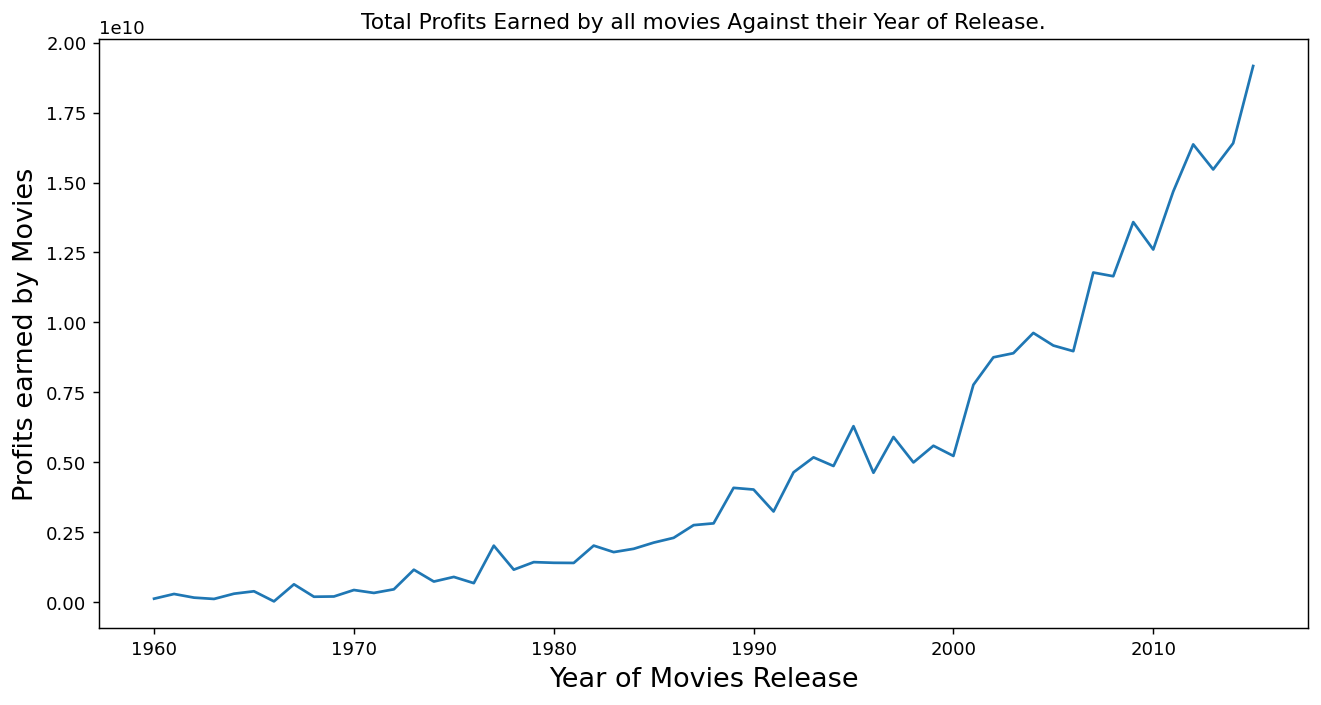

In [67]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profit_by_year = tmdb.groupby('release_year')['profit_earned'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#x-axis
plt.xlabel('Year of Movies Release', fontsize = 15)
#y-axis
plt.ylabel('Profits earned by Movies', fontsize = 15)
#title of the line plot
plt.title('Total Profits Earned by all movies Against their Year of Release.')

#plotting the graph
plt.plot(profit_by_year)

#displaying the line plot
plt.show()

In [69]:
#Calculation to find which year made the highest profit
profit_by_year.idxmax()

2015

From our line graph and calculation we can conclude that profits trend of movies have been steadily increasing from year to year, with a few downward trends between 1990 and 2000. Our calculation also show the 2015 is the year movies made the most or highest profits.

### Research Question 5  : Which actors had most appearances in movies?

In [71]:
actor_count = pd.Series(tmdb['cast'].str.cat(sep = '|').split('|'))
actor_count = actor_count.value_counts(ascending = False)
actor_count.head(20)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
John Goodman          49
Morgan Freeman        49
Liam Neeson           48
Susan Sarandon        48
Julianne Moore        47
Alec Baldwin          47
Gene Hackman          46
Tom Hanks             46
Christopher Walken    46
Johnny Depp           46
Willem Dafoe          45
Dennis Quaid          45
Meryl Streep          44
dtype: int64

Now lets create a graph to represent our result above of the top 20 actors who made the most appearances.

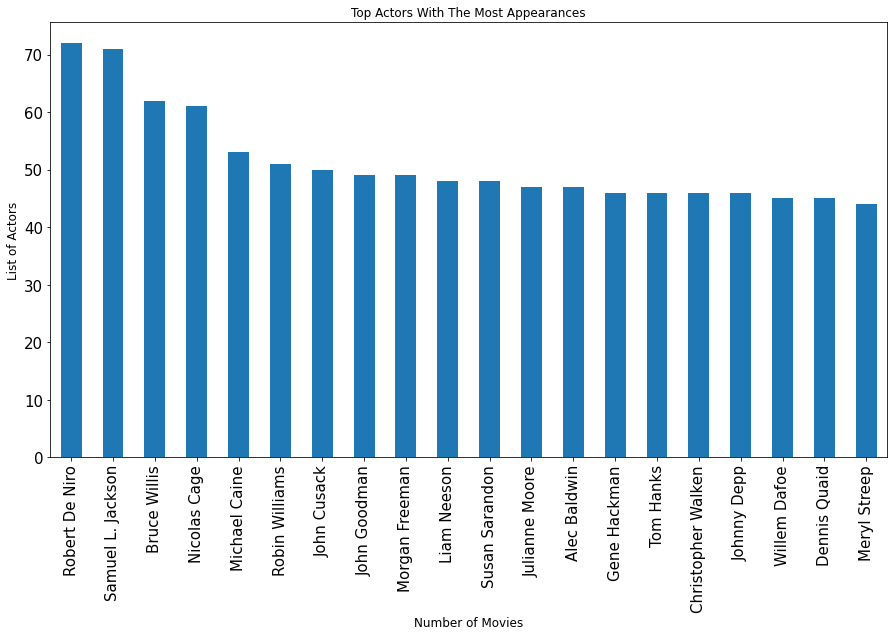

In [81]:
# Initialize the plot
graph = actor_count.head(20).plot.bar(fontsize = 15, figsize=(15,8))
# Set a title
graph.set(title = 'Top Actors With The Most Appearances')
# x-label and y-label
graph.set_xlabel('Number of Movies', fontsize=12)
graph.set_ylabel('List of Actors', fontsize=12)
# Show the plot
plt.show()

<a id='conclusions'></a>
## Conclusions

This was a very interesting analysis of the TMDb  movie dataset. The analysis brought out some intersescting facts about the movies in our dataset. From the questions which were posed, these were the finding made:

1. The most popular movie genre from year to year from the analysis was found to be Drama, followed by comedy surprisingly with western genre movies placing last.

2. The average runtime of movies in the dataset was also found to be approximately 102 minutes with most movies in the provided dataset having a runtime of approximately 80 mintues to approximately 200 minutes.

3. 3400 and more movies fell within this runtime of 80 minutes to 150 minutes.

4. The movie with the most profit made was "Avatar" with an amount of 2,544,505,847 and the movie the made the least profit being the "The Warrior's Way" with an amount of -413,912,431.

5. It was also observed that Although "The Warrior's Way" had the largest budget is had one of the lowest popularity, brought in the lowest revenue and a very low vote count.

6. From the analysis made, the year 2015 was found to be the year within which movies made the most profits.

7. With respect to the actors who made the most appearances in movies in the provided dataset, Robert De Niro made the most appearances.




<a id='limitation'></a>
### Limitations Associated with the Analysis

1. Results were limited to the current state of the provided dataset, meaning an updated dataset might have given different results of the analyis made with respect to the vote_count, popularity and vote_average.

2. Furthermore, it must be taken into account that many entries in the dataset have been removed due to missing and duplicated data entry thereby reducing the sample size of data for the analysis.

The listed references below are links to sites the aided me completing this project pf invesigating a dataset
<a id='references'></a>
## References:

1. https://stackoverflow.com/questions

2. https://www.geeksforgeeks.org/

3. https://datatofish.com/python-tutorials/

4. https://www.codegrepper.com/search.php

5. https://www.matthewunrue.com/Projects/Udacity/TMDb/Project.html

6. https://github.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/blob/master/investigate-a-dataset-template.ipynb

In [82]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1